# Process control for a press hardening manufacturing line

# Approach

# Process Structure

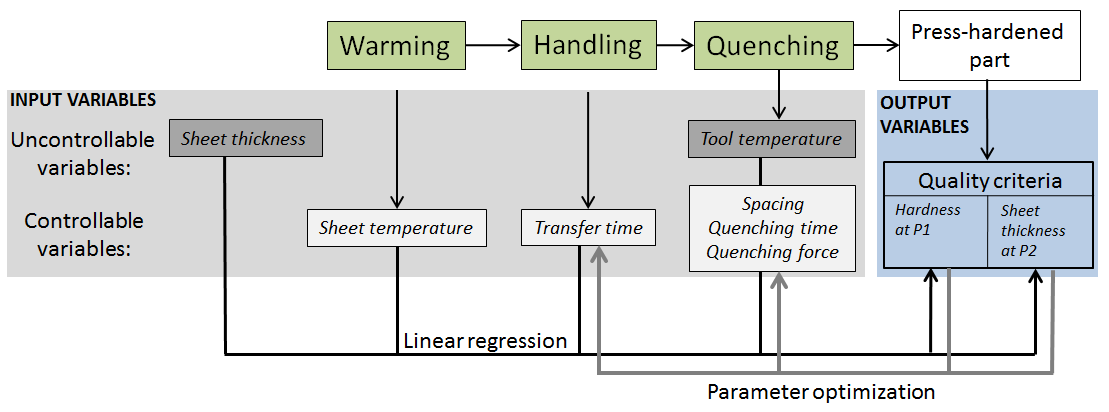

We will discuss about how we can step further in ML4P Project via Artifical Neural Network and Other Type of Regressions

THe following regression method will be observed; Lasso, Rigde and ElasticNet Regression

The following terms important for our report in accordance with clearness. R square error: This error provides us an 
information about how much of total variation in dependentVariable. R square error will always be between 1 and 0.
Adjusted R square error: When a new predictor(independent Variable) added into the equation, R square error increases dramatically 
but it never decrease. We need to adjust R square error with a new mathematical formula.    


# Lasso Regression

It is a type of linear regression with shrinkage. This type of regression is well-suited if we have data sets which comply with the rule of multicolinearity (We will talk about this more). It is also easier to interpret than Ridge Regression

In [1]:
if(!require(readxl)) {
  install.packages("readxl"); require(readxl)
}

if(!require(dplyr)) {
  install.packages("dplyr"); require(dplyr)
}


if(!require(glmnet)) {
  install.packages("glmnet"); require(glmnet)
}


Loading required package: readxl
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



We should add the abovemention code snippet into our R script. They used for installing required libraries. 

In [2]:
#predictor linear model set
currentDirectory <- getwd()

setwd("C:\\Users\\zoint\\Desktop\\AllFiles\\Projeler\\R_Projects")
directoryChanged <- getwd()

my_data <- read_excel("Autoform_1000.xlsx")
fix(my_data)



You can import the file named "Autoform_1000.xlsx" via readxl library.

## Fitting a linear model for quality criterion - "Hardness at P1"


Full linear regression with all variables: 
- sheet thickness (initial)


- sheet temperature (PS1)


- transfer time (PS2)


- tool temperature (PS3)
- spacing (PS3)
- quenching time (PS3)
- quenching force (PS3)

### Null hypothesis - "Hardness at P1"

H_0: there is no relationship between the process parameters and the investigated quality parameter (all coefficients are zero)


In [3]:
print(summary(my_data))

      sim#         thickness     TransportTimeAfterHeating
 Min.   :  1.0   Min.   :1.450   Min.   :10.00            
 1st Qu.:250.5   1st Qu.:1.475   1st Qu.:13.74            
 Median :500.0   Median :1.500   Median :17.49            
 Mean   :500.0   Mean   :1.500   Mean   :17.50            
 3rd Qu.:749.5   3rd Qu.:1.525   3rd Qu.:21.26            
 Max.   :999.0   Max.   :1.550   Max.   :25.00            
 EnforcedTemperatureOfEntireSheet QuenchingTimeInTool QuenchingForce   
 Min.   :900.0                    Min.   : 2.000      Min.   : 500000  
 1st Qu.:912.5                    1st Qu.: 3.995      1st Qu.: 874747  
 Median :925.0                    Median : 5.998      Median :1249685  
 Mean   :925.0                    Mean   : 6.000      Mean   :1250008  
 3rd Qu.:937.5                    3rd Qu.: 8.000      3rd Qu.:1624862  
 Max.   :950.0                    Max.   :10.000      Max.   :2000000  
    spacing       DefaultToolTemperature   HARDNESSP1      HARDNESSP2   
 Min.   :0

In [4]:
lm_all_P1 <- lm(HARDNESSP1 ~ ., data = my_data[,1:9]) 

### Reduced Model - "Hardness at P1"


In [5]:
#Reduced Model "Hardness at P1"
lm_reduced_P1 <- update(lm_all_P1, .~. - sim. -thickness)
print(summary(lm_reduced_P1))
P1_Hardness_coeffs=lm_reduced_P1$coefficients
print(P1_Hardness_coeffs)


Call:
lm(formula = HARDNESSP1 ~ `sim#` + TransportTimeAfterHeating + 
    EnforcedTemperatureOfEntireSheet + QuenchingTimeInTool + 
    QuenchingForce + spacing + DefaultToolTemperature, data = my_data[, 
    1:9])

Residuals:
    Min      1Q  Median      3Q     Max 
-49.107  -6.918   1.021   6.439  41.810 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -4.450e+02  2.055e+01 -21.656  < 2e-16 ***
`sim#`                           -5.407e-04  1.113e-03  -0.486   0.6273    
TransportTimeAfterHeating        -6.197e+00  7.402e-02 -83.715  < 2e-16 ***
EnforcedTemperatureOfEntireSheet  1.066e+00  2.216e-02  48.109  < 2e-16 ***
QuenchingTimeInTool               3.238e-01  1.387e-01   2.335   0.0197 *  
QuenchingForce                    3.531e-06  7.402e-07   4.770 2.12e-06 ***
spacing                           1.076e+00  5.831e-01   1.846   0.0652 .  
DefaultToolTemperature           -7.371e-02  5.046e-03 -14.607  < 2

# Lasso Implementation on Hardness P1 

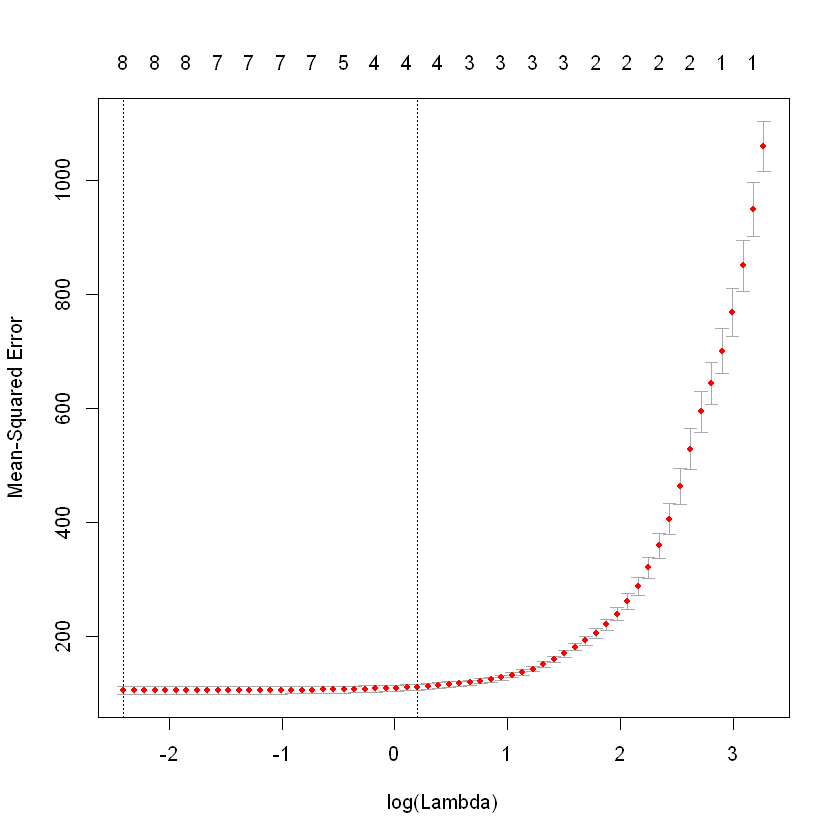

In [6]:
dependentValue <- my_data$HARDNESSP1
independentValues <- my_data %>% select(`sim#`, thickness, TransportTimeAfterHeating, EnforcedTemperatureOfEntireSheet, QuenchingTimeInTool, QuenchingForce, spacing, DefaultToolTemperature) %>% data.matrix()
#cross validation counterpart for glmnet function
cv_fit <- cv.glmnet(independentValues, dependentValue, family="gaussian", nfolds = 5, alpha = 1)
plot(cv_fit)

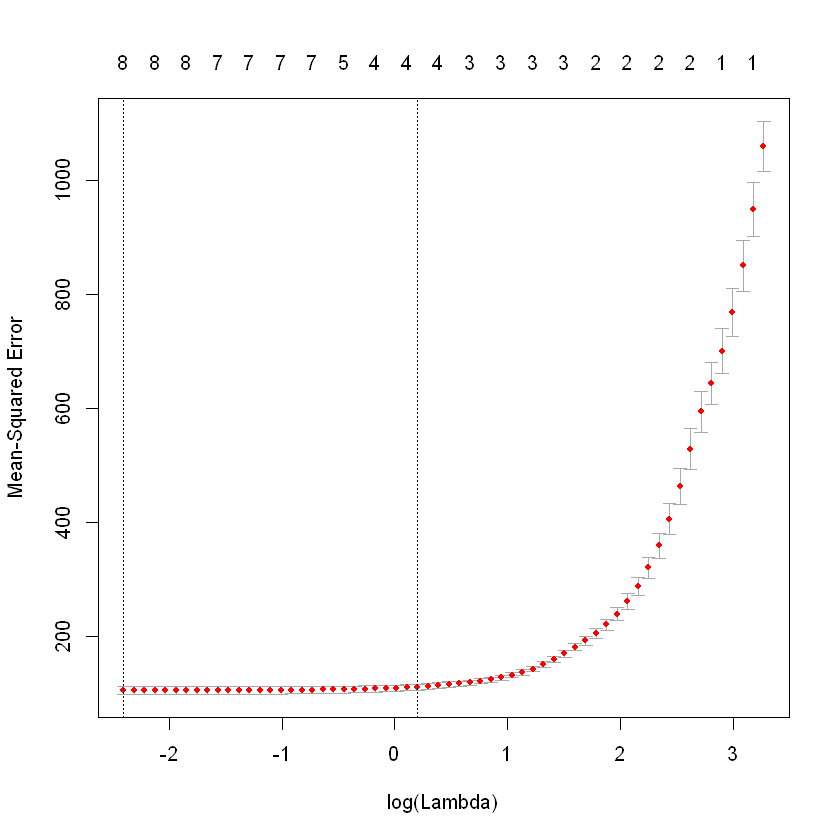

In [7]:
opt_lambda = cv_fit$lambda.min

In [8]:
y_predicted <- predict(cv_fit, s = opt_lambda, newx = independentValues)

In [9]:
#R squared error calculation
sst <- sum((dependentValue - mean(dependentValue))^2)
sse <- sum((y_predicted - dependentValue)^2)

#R squared
rsq <- 1 - sse / sst
print(paste0("R squared error", rsq))


[1] "R squared error0.904372761966367"


# Ridge Regression

In [10]:
if(!require(glmnet)) {
  install.packages("glmnet"); require(glmnet)
}
if(!require(readxl)) {
  install.packages("readxl"); require(readxl)
}

if(!require(magrittr)) {
  install.packages("magrittr"); require(magrittr)
}

if(!require(dplyr)) {
  install.packages("dplyr"); require(dplyr)
}

Loading required package: magrittr


In [11]:
currentDirectory <- getwd()
setwd("C:\\Users\\zoint\\Desktop\\AllFiles\\Projeler\\R_Projects")
directoryChanged <- getwd()
my_data <- read_excel("Autoform_1000.xlsx")
fix(my_data)

# Hardness P1 Linear Regression Model 

In [ ]:
lm_all_P1 <- lm(HARDNESSP1 ~ ., data = my_data[,1:9]) 

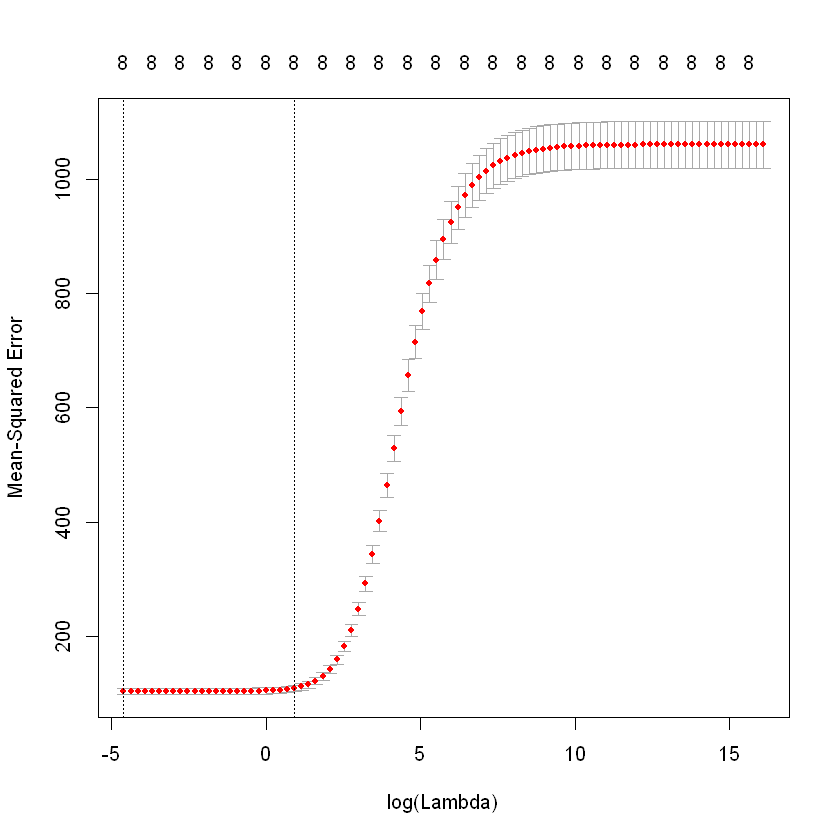

In [12]:
dependentValue <- my_data$HARDNESSP1
independentValues <- my_data %>% select(`sim#`, thickness, TransportTimeAfterHeating, EnforcedTemperatureOfEntireSheet, QuenchingTimeInTool, QuenchingForce, spacing, DefaultToolTemperature) %>% data.matrix()
lambdas <- 10 ^ seq(7, -2, by = -.1)
cv_fit <- cv.glmnet(independentValues, dependentValue, alpha = 0, lambda = lambdas)
plot(cv_fit)


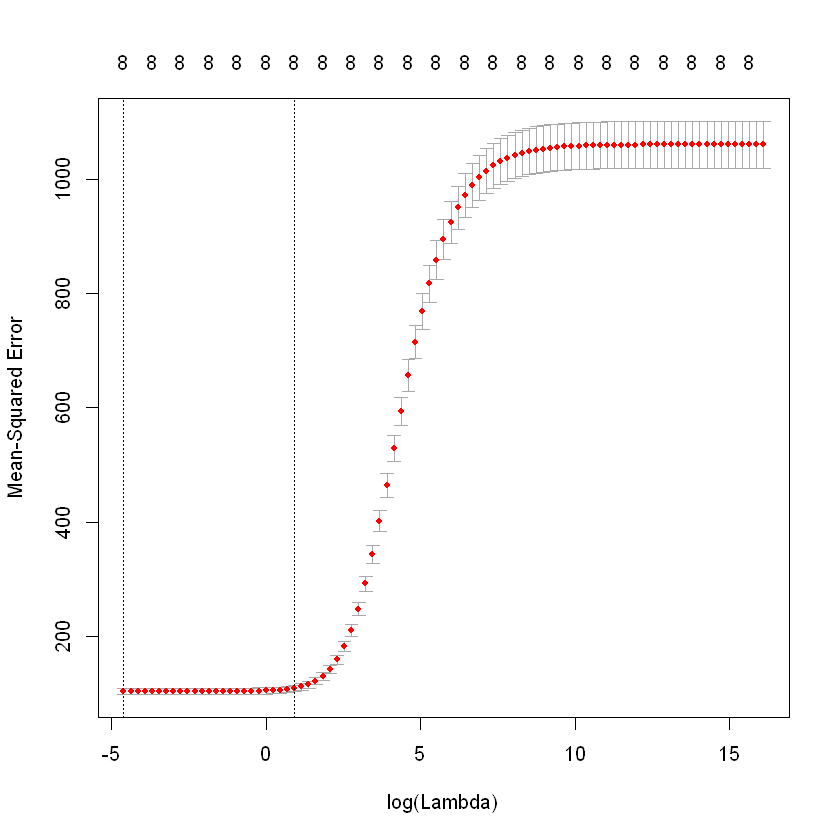

In [ ]:
opt_lambda <- cv_fit$lambda.min

In [ ]:
y_predicted <- predict(cv_fit, s = opt_lambda, newx = independentValues)

In [13]:
# R squared error calculation
sst <- sum((dependentValue - mean(dependentValue))^2)
sse <- sum((y_predicted - dependentValue)^2)

#R squared
rsq <- 1 - sse / sst
print(paste0("R squared error", rsq))


[1] "R squared error0.904372761966367"


# Elastic Net Regression

In [16]:
if(!require(corrplot)) {
  install.packages("corrplot"); require(corrplot)
}

Loading required package: corrplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'corrplot'"Installing package into 'C:/Users/zoint/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoint\AppData\Local\Temp\RtmpiCLEIL\downloaded_packages


Loading required package: corrplot


In [17]:
currentDirectory <- getwd()
setwd("C:\\Users\\zoint\\Desktop\\AllFiles\\Projeler\\R_Projects")
directoryChanged <- getwd()
my_data <- read_excel("Autoform_1000.xlsx")
fix(my_data)


In [1]:
correlationValue <- cor(my_data[1:9])
corrplot.mixed(correlationValue)

ERROR: Error in apply(my_data, 2, function(x) sum(is.na(x))): object 'my_data' not found


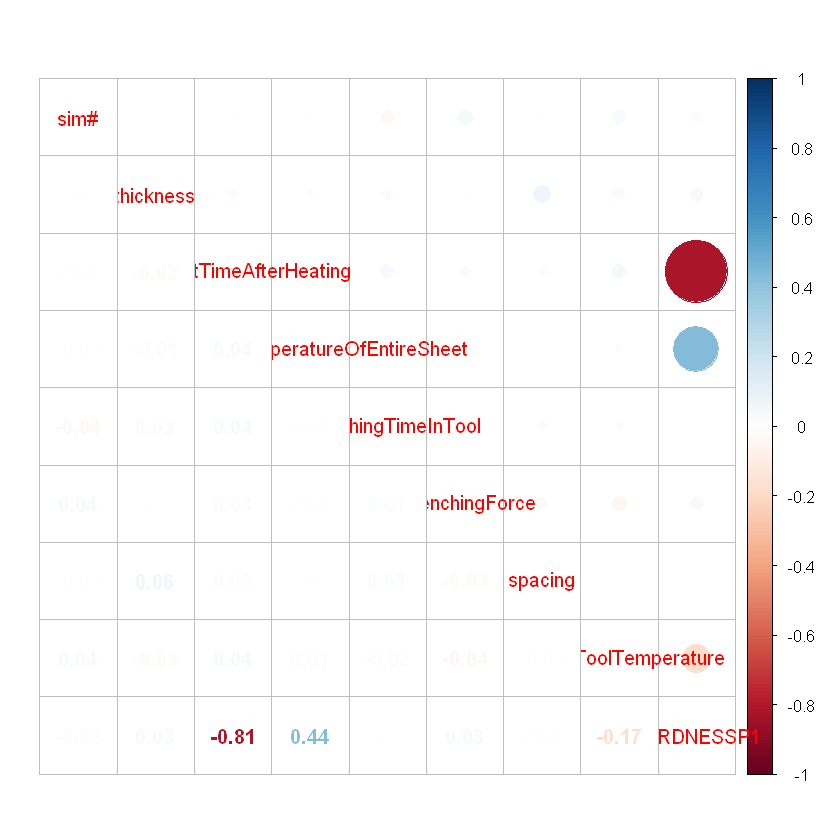

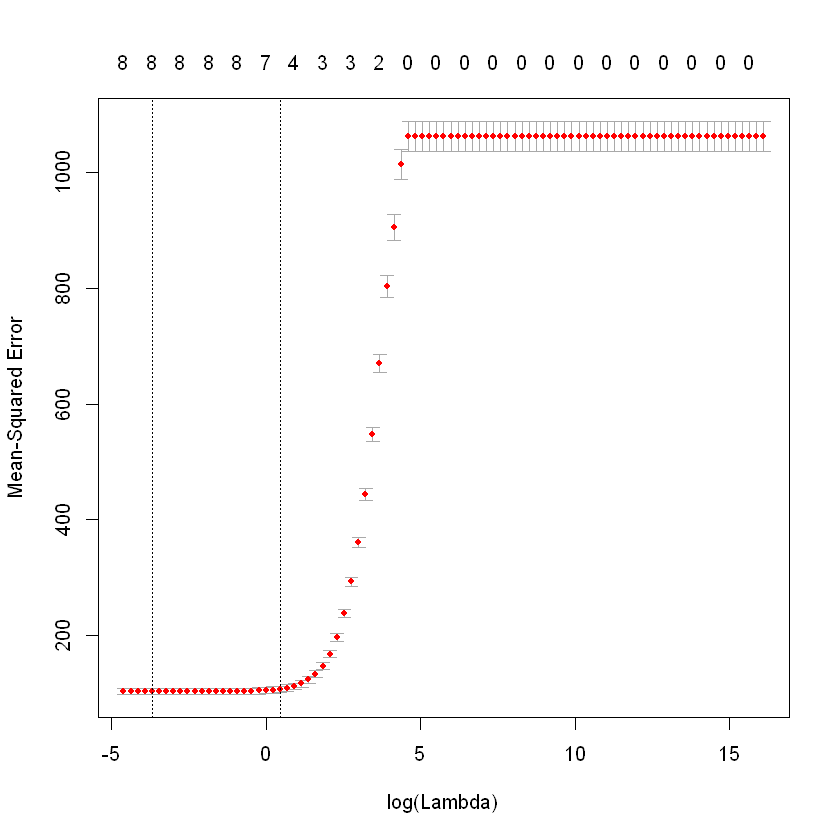

In [19]:
dependentValue.train <- my_data$HARDNESSP1
independentValues.train <- my_data %>% select(`sim#`, thickness, TransportTimeAfterHeating, EnforcedTemperatureOfEntireSheet, QuenchingTimeInTool, QuenchingForce, spacing, DefaultToolTemperature) %>% data.matrix()
lambdas <- 10 ^ seq(7, -2, by = -.1)
fit <- cv.glmnet(independentValues.train, dependentValue.train, nfolds = 5, alpha=.3, type.measure = "mse", lambda = lambdas, family="gaussian")
plot(fit)

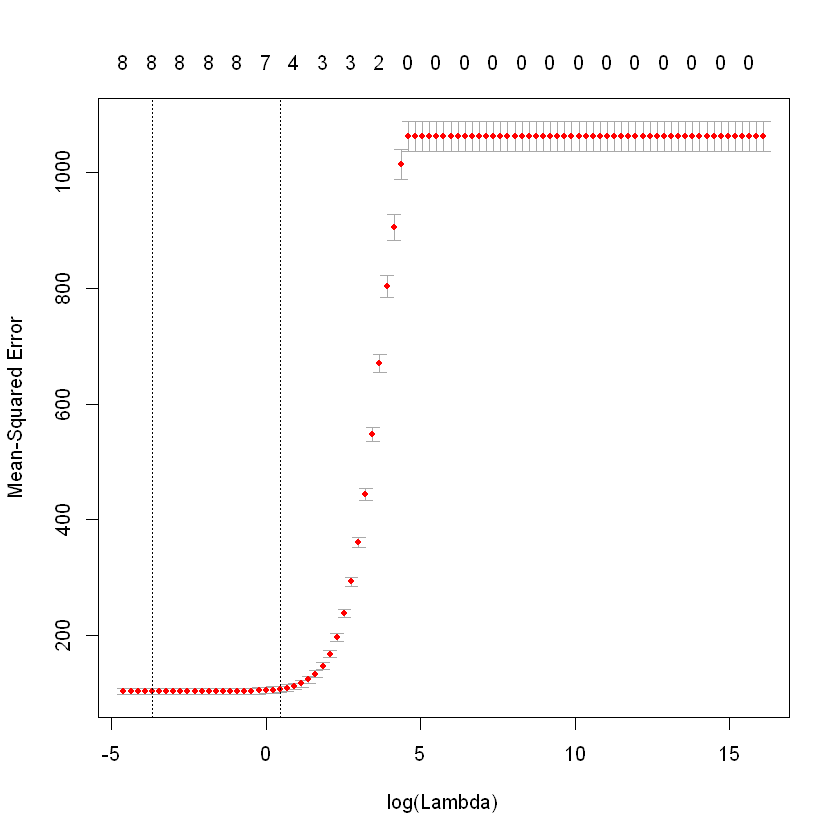

In [20]:
best_lambda = fit$lambda.min
en_coeff = predict(fit,s = best_lambda,type = "coefficients")
print(en_coeff)

9 x 1 sparse Matrix of class "dgCMatrix"
                                             1
(Intercept)                      -4.706313e+02
sim#                             -5.185915e-04
thickness                         1.752075e+01
TransportTimeAfterHeating        -6.188789e+00
EnforcedTemperatureOfEntireSheet  1.065340e+00
QuenchingTimeInTool               3.146650e-01
QuenchingForce                    3.514499e-06
spacing                           1.003155e+00
DefaultToolTemperature           -7.336444e-02


In [ ]:
y_predicted = predict(fit,s = best_lambda,newx = independentValues.train)

In [21]:
sst <- sum((dependentValue.train - mean(dependentValue.train))^2)
sse <- sum((y_predicted - dependentValue.train)^2)

#R squared
rsq <- 1 - sse / sst
print(paste0("R squared error", rsq))

[1] "R squared error0.904372761966367"


# Linear Regression by Gradient Descent Optimization

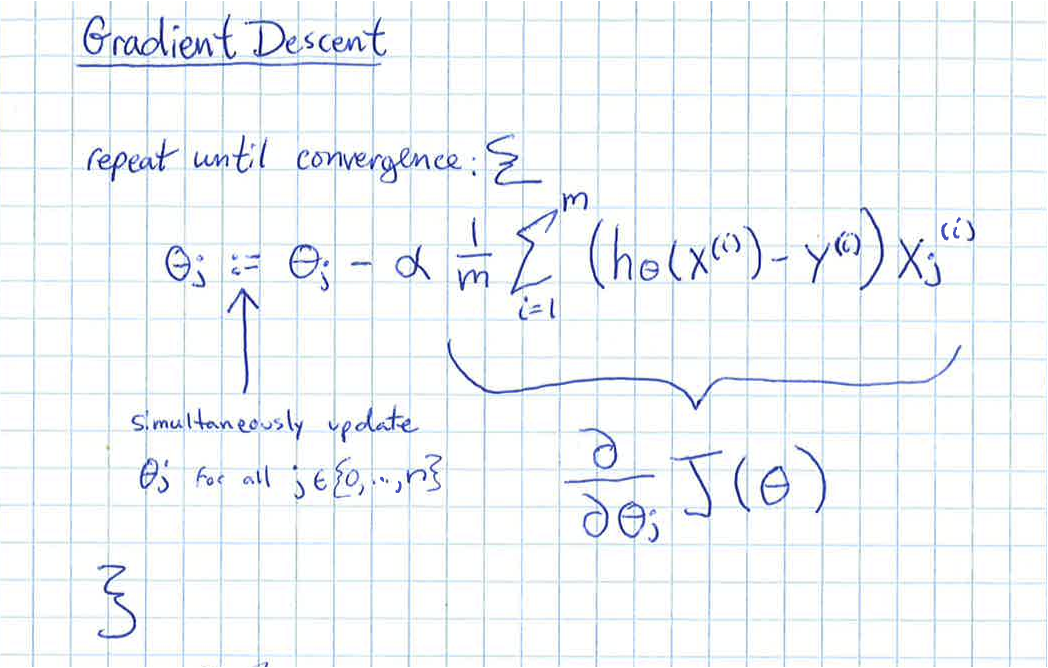

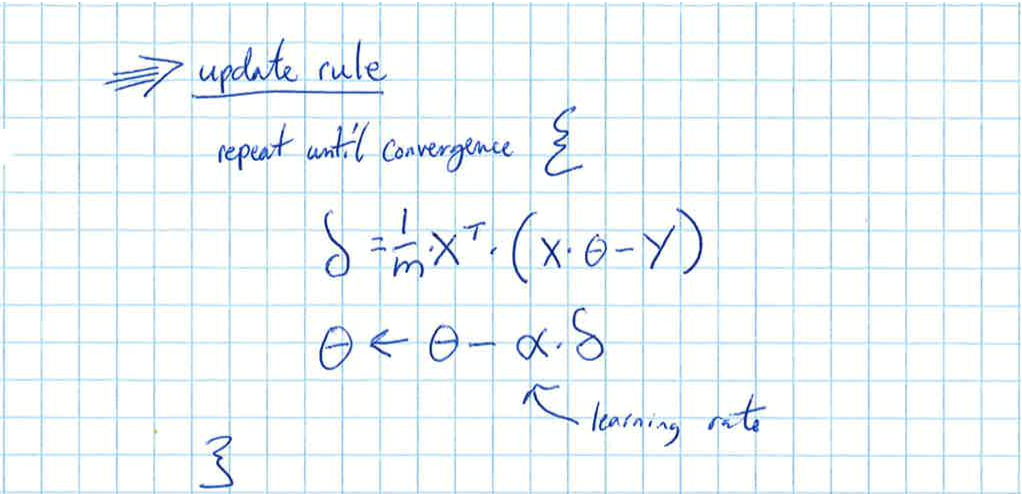